In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Unnamed: 0,Population,Area (sq. km.),Pop. Density (per sq. km.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,1,0,0,0,0,0,0,0,1
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,1,0,0,0,0,2
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,1,0,0,3
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,1,4


In [3]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [5]:
poly1 = PolynomialFeatures(degree = 3)
xpoly=poly1.fit_transform(X_train)
lm1 = LinearRegression()
lm1.fit(xpoly,y_train)

LinearRegression()

In [6]:
poly1_pred = lm1.predict(poly1.fit_transform(X_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=poly1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,4.130717e+04
54,31100.000000,2.901257e+04
185,13300.000000,5.568819e+03
80,20000.000000,-5.333859e+05
33,600.000000,1.099447e+04
201,7400.000000,-1.317420e+05
37,1400.000000,9.971528e+03
218,4800.000000,-2.992567e+04
199,1000.000000,-1.459589e+03
66,22000.000000,1.015965e+04


In [7]:
print('polynomial regresssion Performance with linear regression:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, poly1_pred))
print('MSE:', metrics.mean_squared_error(y_test, poly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, poly1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, poly1_pred))

polynomial regresssion Performance with linear regression:

all features, No scaling:
MAE: 579428.9255013897
MSE: 11479255103349.123
RMSE: 3388104.9427886857
R2_Score:  -140615.90801904298


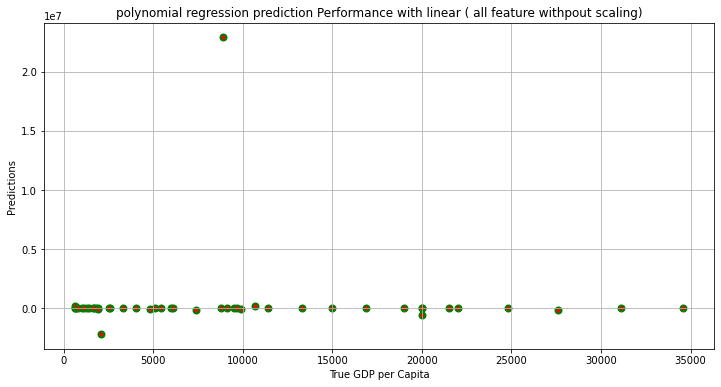

In [8]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,poly1_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with linear ( all feature withpout scaling)') 
plt.grid()
plt.show()

In [9]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [10]:
poly2 = PolynomialFeatures(degree = 3)
x2poly=poly2.fit_transform(X2_train)
lm2 = LinearRegression()
lm2.fit(x2poly,y2_train)

LinearRegression()

In [11]:
poly2_pred = lm2.predict(poly2.fit_transform(X2_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=poly2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,4319.270947
54,31100.000000,43780.901790
185,13300.000000,9539.291070
80,20000.000000,10586.121840
33,600.000000,-881.953235
201,7400.000000,4803.374794
37,1400.000000,-2010.970615
218,4800.000000,12239.045484
199,1000.000000,1250.647894
66,22000.000000,10379.766218


In [12]:
print('polynomial regresssion Performance with linear regression:')
print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, poly2_pred))
print('MSE:', metrics.mean_squared_error(y_test, poly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, poly2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, poly2_pred))

polynomial regresssion Performance with linear regression:

all features, with scaling:
MAE: 5526.788913898791
MSE: 11479255103349.123
RMSE: 8383.045534197076
R2_Score:  0.1391499935182301


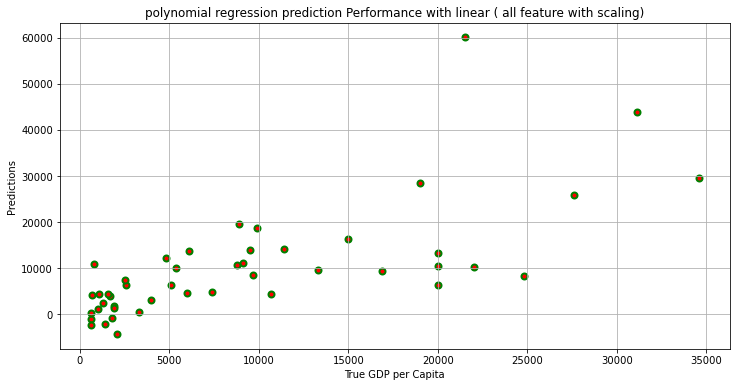

In [13]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,poly2_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with linear ( all feature with scaling)') 
plt.grid()
plt.show()

In [14]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. km.)', 'Arable (%)','Crops (%)',
                        'Climate',"Agriculture"], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [15]:
poly3 = PolynomialFeatures(degree = 3)
x3poly=poly3.fit_transform(X3_train)
lm3 = LinearRegression()
lm3.fit(x3poly,y3_train)

LinearRegression()

In [16]:
poly3_pred = lm3.predict(poly3.fit_transform(X3_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=poly3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,273.205314
54,31100.000000,62760.437074
185,13300.000000,6339.985712
80,20000.000000,22513.889027
33,600.000000,-8509.092159
201,7400.000000,9790.694924
37,1400.000000,7319.624607
218,4800.000000,11417.336023
199,1000.000000,-10762.734985
66,22000.000000,12644.896429


In [17]:
print('polynomial regresssion Performance with linear regression:')
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, poly3_pred))
print('MSE:', metrics.mean_squared_error(y_test, poly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, poly3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, poly3_pred))

polynomial regresssion Performance with linear regression:

selected features, No scaling:
MAE: 18261.303050246584
MSE: 11479255103349.123
RMSE: 43312.53478032088
R2_Score:  -21.980053647413317


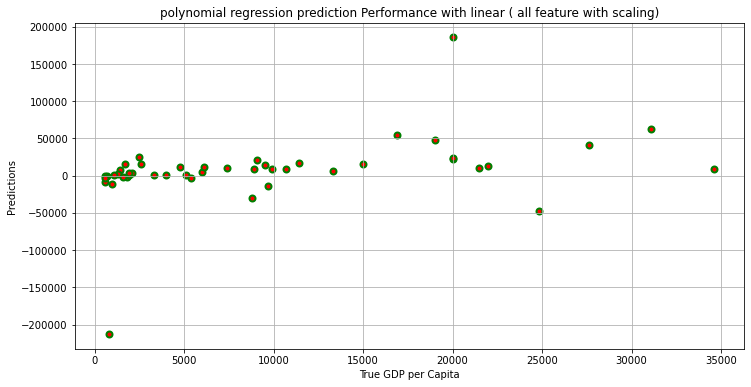

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,poly3_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with linear ( all feature with scaling)') 
plt.grid()
plt.show()

In [19]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [20]:
poly4 = PolynomialFeatures(degree = 3)
x4poly=poly4.fit_transform(X4_train)
lm4 = LinearRegression()
lm4.fit(x4poly,y4_train)

LinearRegression()

In [21]:
poly4_pred = lm4.predict(poly4.fit_transform(X4_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=poly4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,3012.591874
54,31100.000000,33074.098373
185,13300.000000,11014.262835
80,20000.000000,1660.873800
33,600.000000,258.389970
201,7400.000000,5542.042114
37,1400.000000,-5578.798728
218,4800.000000,14247.941047
199,1000.000000,-2280.258777
66,22000.000000,2437.494786


In [22]:
print('polynomial regresssion Performance with linear regression:')
print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, poly4_pred))
print('MSE:', metrics.mean_squared_error(y_test, poly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, poly4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, poly4_pred))

polynomial regresssion Performance with linear regression:

selected features, with scaling:
MAE: 7253.959607945069
MSE: 11479255103349.123
RMSE: 13745.75442431271
R2_Score:  -1.3145203216839185


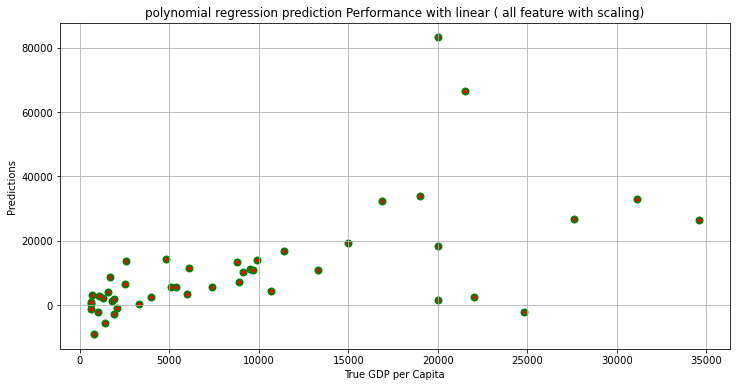

In [23]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,poly4_pred,color='red', linewidths=2, edgecolors='green')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with linear ( all feature with scaling)') 
plt.grid()
plt.show()